In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 
import warnings
warnings.filterwarnings('ignore')

CSV_list

'AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX', 'TSCO', 'TW', 'ULVR'

In [2]:
stocks = ['AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX', 'TSCO', 'TW', 'ULVR']
# start_date = '2016-01-01'
# end_date = '2021-01-01'

In [3]:
def get_dates(lst, start_str, end_str):
    data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(lst[0]))
    data = data.loc[(data['time']>=start_str)&(data['time']<end_str)]
    date = [datetime.fromisoformat(i[:10]) for i in data['time']]
    return(date)

In [4]:
def get_prices(lst,start_str, end_str):   
    new_list = []
    for i in lst:
        data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(i)) # read data from csv 注意文件夹路径和文件名
        df = data[['time','close']]                                          # get time and close price
        df.columns = ['date', i]                                       # change column names
        df.date = [datetime.fromisoformat(i[:10]) for i in df['date']]       # convert dates into datetime
        df = df.loc[(df['date']>=start_str)&(df['date']<end_str)]    # make sure date start from 2016-01-01
        df = df.reset_index(drop=True)
        new_list.append(df[i])
    return(new_list)

In [5]:
date = get_dates(stocks,'2016-01-01','2021-01-01')
# date.head()

In [6]:
box = get_prices(stocks,'2016-01-01','2021-01-01')
# box.head()

In [7]:
df = pd.DataFrame(np.array(box).T, columns=stocks , index=np.array(date).T)
df.head()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2016-01-04,1080.0,497.60001,493.5,1364.5,520.40002,205.2,925.90002,1538.0,1902.5,3190.0,142.25000,199.3,2821.0
2016-01-05,1097.0,500.00000,494.0,1386.0,522.59998,203.0,933.29999,1535.0,1939.5,3225.0,144.39999,199.2,2850.5
2016-01-06,1067.0,495.29999,512.5,1380.5,508.29999,206.4,950.00000,1504.0,1846.5,3191.0,141.55000,197.0,2818.0
2016-01-07,1047.0,481.89999,505.5,1344.5,502.00000,208.8,949.79999,1462.0,1784.5,3175.0,139.20000,192.2,2792.0
2016-01-08,1021.0,476.89999,519.5,1371.5,499.10001,206.6,940.09998,1375.5,1739.0,3129.0,146.89999,193.7,2778.5


In [8]:
df.to_csv('/Users/paxton615/Desktop/13stocks.csv')

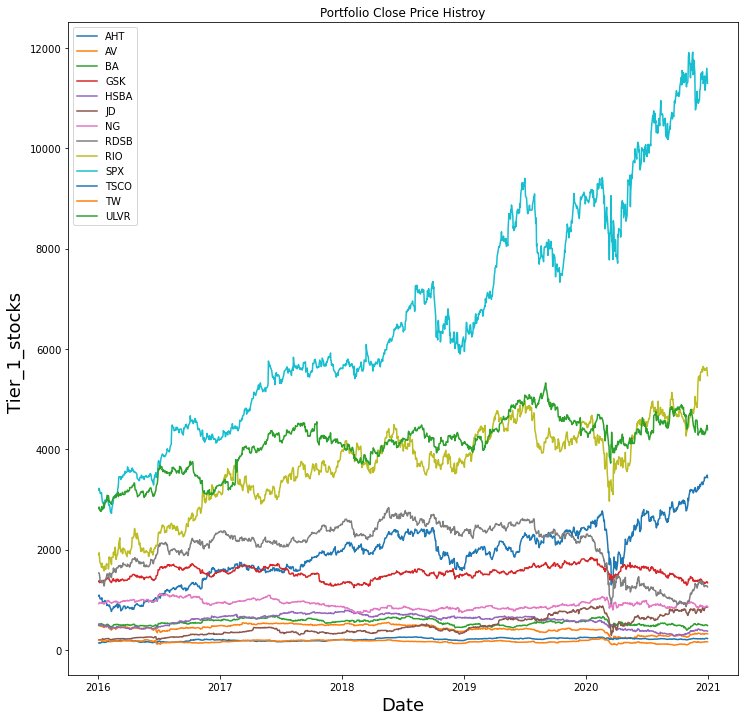

In [9]:
# visually show portfolio
title = 'Portfolio Close Price Histroy'

# get the stocks
my_stocks = df

# create
plt.figure(figsize=(12,12))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stocks ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [10]:
# show the daily simple return
returns = df.pct_change() #  pct_change = (day_price - previous_day_price) / previous_day_price
returns.head()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.015741,0.004823,0.001013,0.015757,0.004227,-0.010721,0.007992,-0.001951,0.019448,0.010972,0.015114,-0.000502,0.010457
2016-01-06,-0.027347,-0.009400,0.037449,-0.003968,-0.027363,0.016749,0.017894,-0.020195,-0.047951,-0.010543,-0.019737,-0.011044,-0.011402
2016-01-07,-0.018744,-0.027054,-0.013659,-0.026078,-0.012394,0.011628,-0.000211,-0.027926,-0.033577,-0.005014,-0.016602,-0.024365,-0.009226
2016-01-08,-0.024833,-0.010376,0.027695,0.020082,-0.005777,-0.010536,-0.010213,-0.059166,-0.025497,-0.014488,0.055316,0.007804,-0.004835


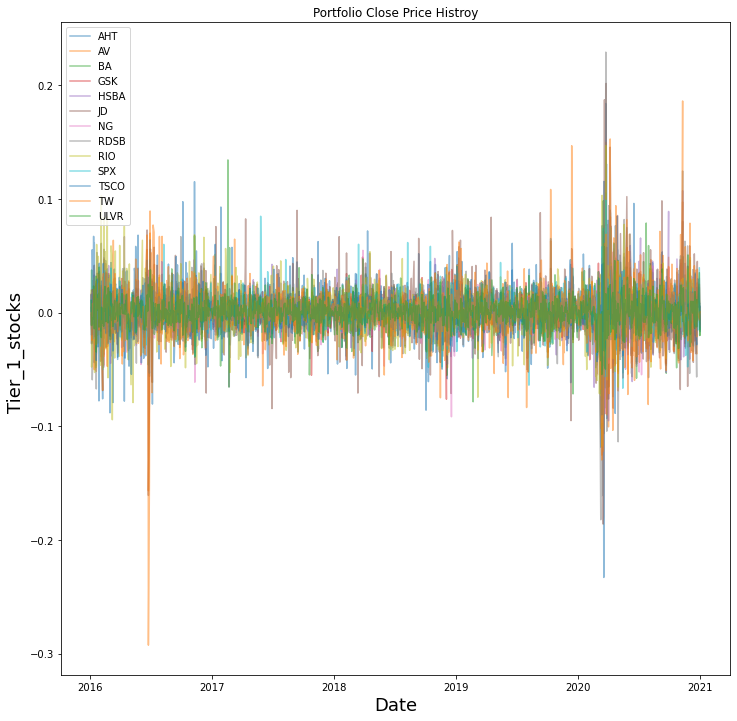

In [11]:
# visually show portfolio
title = 'Portfolio Close Price Histroy'

# get the stocks
my_stocks = returns

# create
plt.figure(figsize=(12,12))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c, alpha=0.5)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stocks ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [12]:
# check the covariance among stocks
returns.cov()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.000547,0.000228,0.000174,0.000096,0.000162,0.000257,0.000064,0.000236,0.000217,0.000168,0.000079,0.000212,0.000070
AV,0.000228,0.000357,0.000139,0.000062,0.000166,0.000241,0.000065,0.000213,0.000170,0.000104,0.000107,0.000276,0.000041
BA,0.000174,0.000139,0.000239,0.000073,0.000099,0.000147,0.000057,0.000137,0.000109,0.000092,0.000060,0.000138,0.000053
GSK,0.000096,0.000062,0.000073,0.000167,0.000069,0.000050,0.000083,0.000107,0.000074,0.000065,0.000040,0.000041,0.000086
HSBA,0.000162,0.000166,0.000099,0.000069,0.000252,0.000104,0.000055,0.000175,0.000145,0.000082,0.000066,0.000127,0.000058
JD,0.000257,0.000241,0.000147,0.000050,0.000104,0.000672,0.000049,0.000182,0.000104,0.000094,0.000085,0.000327,0.000037
NG,0.000064,0.000065,0.000057,0.000083,0.000055,0.000049,0.000188,0.000079,0.000050,0.000051,0.000051,0.000077,0.000082
RDSB,0.000236,0.000213,0.000137,0.000107,0.000175,0.000182,0.000079,0.000441,0.000239,0.000108,0.000071,0.000146,0.000075
RIO,0.000217,0.000170,0.000109,0.000074,0.000145,0.000104,0.000050,0.000239,0.000445,0.000119,0.000088,0.000103,0.000044
SPX,0.000168,0.000104,0.000092,0.000065,0.000082,0.000094,0.000051,0.000108,0.000119,0.000223,0.000058,0.000079,0.000062


In [13]:
# create the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.137832,0.057396,0.043824,0.024291,0.040782,0.064752,0.016135,0.059530,0.054677,0.042406,0.019917,0.053515,0.017561
AV,0.057396,0.089965,0.035064,0.015738,0.041922,0.060848,0.016329,0.053564,0.042948,0.026280,0.027039,0.069586,0.010253
BA,0.043824,0.035064,0.060153,0.018329,0.024829,0.036991,0.014462,0.034410,0.027380,0.023200,0.015217,0.034870,0.013466
GSK,0.024291,0.015738,0.018329,0.042089,0.017302,0.012516,0.020991,0.026892,0.018763,0.016345,0.010015,0.010420,0.021549
HSBA,0.040782,0.041922,0.024829,0.017302,0.063393,0.026258,0.013767,0.044045,0.036640,0.020750,0.016598,0.032125,0.014686
JD,0.064752,0.060848,0.036991,0.012516,0.026258,0.169282,0.012450,0.045952,0.026319,0.023793,0.021411,0.082282,0.009251
NG,0.016135,0.016329,0.014462,0.020991,0.013767,0.012450,0.047448,0.019833,0.012632,0.012825,0.012761,0.019319,0.020781
RDSB,0.059530,0.053564,0.034410,0.026892,0.044045,0.045952,0.019833,0.111052,0.060297,0.027276,0.017810,0.036798,0.018905
RIO,0.054677,0.042948,0.027380,0.018763,0.036640,0.026319,0.012632,0.060297,0.112028,0.030028,0.022075,0.025872,0.011083
SPX,0.042406,0.026280,0.023200,0.016345,0.020750,0.023793,0.012825,0.027276,0.030028,0.056096,0.014583,0.019990,0.015659


先创建均分的weights

In [14]:
weight = 1/len(stocks)
weights = np.full(shape=len(stocks), fill_value=weight, dtype=np.float)
# weights

In [15]:
# calculate the portfolio variance
port_variance = np.dot(weights.T , np.dot(cov_matrix_annual, weights))
port_variance

0.032492930277447415

In [16]:
# calculate the portfolio volatility aka std
port_volatility = np.sqrt(port_variance)
port_volatility

0.1802579548243223

In [17]:
# calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.1158813218183487

In [18]:
# show the expected annual return, volatility(risk), varicance
percent_var = str( round(port_variance, 2) * 100)+ '%'
percent_vols = str( round(port_volatility, 2) *100)+ '%'
percent_ret = str( round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print('expected annual return:'+ percent_ret)
print('annual volatility/risk:'+ percent_vols)
print('annual variance:'+ percent_var)

expected annual return:12.0%
annual volatility/risk:18.0%
annual variance:3.0%


In [19]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models 
from pypfopt import expected_returns

In [20]:
# portfolio optimization!

# calculate expected returns and the annualised sample cov matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

In [21]:
mu

AHT     0.259674
AV     -0.081306
BA     -0.001906
GSK    -0.003309
HSBA   -0.061329
JD      0.330670
NG     -0.013473
RDSB   -0.039060
RIO     0.234361
SPX     0.286683
TSCO    0.101865
TW     -0.036024
ULVR    0.092270
dtype: float64

In [22]:
S

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.137832,0.057396,0.043824,0.024291,0.040782,0.064752,0.016135,0.059530,0.054677,0.042406,0.019917,0.053515,0.017561
AV,0.057396,0.089965,0.035064,0.015738,0.041922,0.060848,0.016329,0.053564,0.042948,0.026280,0.027039,0.069586,0.010253
BA,0.043824,0.035064,0.060153,0.018329,0.024829,0.036991,0.014462,0.034410,0.027380,0.023200,0.015217,0.034870,0.013466
GSK,0.024291,0.015738,0.018329,0.042089,0.017302,0.012516,0.020991,0.026892,0.018763,0.016345,0.010015,0.010420,0.021549
HSBA,0.040782,0.041922,0.024829,0.017302,0.063393,0.026258,0.013767,0.044045,0.036640,0.020750,0.016598,0.032125,0.014686
JD,0.064752,0.060848,0.036991,0.012516,0.026258,0.169282,0.012450,0.045952,0.026319,0.023793,0.021411,0.082282,0.009251
NG,0.016135,0.016329,0.014462,0.020991,0.013767,0.012450,0.047448,0.019833,0.012632,0.012825,0.012761,0.019319,0.020781
RDSB,0.059530,0.053564,0.034410,0.026892,0.044045,0.045952,0.019833,0.111052,0.060297,0.027276,0.017810,0.036798,0.018905
RIO,0.054677,0.042948,0.027380,0.018763,0.036640,0.026319,0.012632,0.060297,0.112028,0.030028,0.022075,0.025872,0.011083
SPX,0.042406,0.026280,0.023200,0.016345,0.020750,0.023793,0.012825,0.027276,0.030028,0.056096,0.014583,0.019990,0.015659


In [23]:
# optimaize for max sharp ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
print(ef.portfolio_performance(verbose=True))

OrderedDict([('AHT', 0.0), ('AV', 0.0), ('BA', 0.0), ('GSK', 0.0), ('HSBA', 0.0), ('JD', 0.20876), ('NG', 0.0), ('RDSB', 0.0), ('RIO', 0.10117), ('SPX', 0.69007), ('TSCO', 0.0), ('TW', 0.0), ('ULVR', 0.0)])
Expected annual return: 29.1%
Annual volatility: 21.8%
Sharpe Ratio: 1.24
(0.2905719898465595, 0.21770677680833633, 1.2428275950489331)


In [24]:
# get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'JD': 240, 'RIO': 19, 'SPX': 61, 'TW': 4}
Funds remaining: $11.80
